In [24]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [4]:
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [7]:
df.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [33]:
# Performing train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)

In [34]:
# Finding Optimal Value of k
# Empty list for appending rmse
rmse_val = []
for K in range(20):
    K = K+1 
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('RMSE value for k = ', K, 'is : ', error)

RMSE value for k =  1 is :  6.900198917280516
RMSE value for k =  2 is :  6.246920810114623
RMSE value for k =  3 is :  6.313907255939171
RMSE value for k =  4 is :  5.719723143923773
RMSE value for k =  5 is :  5.925530339465116
RMSE value for k =  6 is :  5.854587795659111
RMSE value for k =  7 is :  5.9456468349974
RMSE value for k =  8 is :  6.12183116307659
RMSE value for k =  9 is :  6.297804541896349
RMSE value for k =  10 is :  6.310279273519035
RMSE value for k =  11 is :  6.400590499516842
RMSE value for k =  12 is :  6.466048206730655
RMSE value for k =  13 is :  6.399722219215355
RMSE value for k =  14 is :  6.413062017927031
RMSE value for k =  15 is :  6.590498376095385
RMSE value for k =  16 is :  6.660293666104372
RMSE value for k =  17 is :  6.701873131221773
RMSE value for k =  18 is :  6.71684943465057
RMSE value for k =  19 is :  6.740622669382674
RMSE value for k =  20 is :  6.7687652920182835


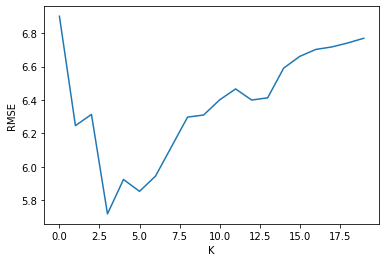

In [35]:
# Plot
k_range = range(20)
plt.plot(k_range, rmse_val)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()